In [18]:
import pandas as pd 

beer = pd.read_csv('./data/data.csv')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Miller,150,14,4.8,0.50
7,Coors,148,12,4.5,0.49
8,Stella_Artois,175,18,5.3,0.85
9,Guinness,210,22,4.2,0.95


In [19]:
X = beer[['calories', 'sodium', 'alcohol', 'cost']]

In [20]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)

In [21]:
km.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [22]:
beer['cluster'] = km.labels_
beer['cluster2'] = km2.labels_ 
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
0,Budweiser,144,15,4.7,0.43,0,0
19,Sapporo,148,13,5.2,0.70,0,0
18,Peroni,140,9,4.7,0.58,0,0
16,Carlsberg,155,12,4.6,0.55,0,0
13,Amstel,146,14,4.8,0.60,0,0
12,Beck's,142,11,5.0,0.65,0,0
20,Asahi,150,11,5.0,0.72,0,0
10,Corona,139,10,4.6,0.70,0,0
6,Miller,150,14,4.8,0.50,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0


In [23]:
from pandas.plotting import scatter_matrix
%matplotlib inline

cluster_centers = km.cluster_centers_

cluster_centers_2 = km2.cluster_centers_

In [24]:
beer.groupby('cluster').mean(numeric_only=True)

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,148.333333,13.533333,4.653333,0.578667,0.0
1,173.333333,13.666667,5.133333,0.773333,0.0
2,210.000000,22.000000,4.200000,0.950000,1.0


In [25]:
beer.groupby('cluster2').mean(numeric_only=True)

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,155.47619,13.571429,4.790476,0.634286,0.285714
1,210.00000,22.000000,4.200000,0.950000,2.000000


In [30]:
centers = beer.groupby('cluster').mean(numeric_only=True).reset_index()
centers

,cluster,calories,sodium,alcohol,cost,cluster2
0,0,148.333333,13.533333,4.653333,0.578667,0.0
1,1,173.333333,13.666667,5.133333,0.773333,0.0
2,2,210.000000,22.000000,4.200000,0.950000,1.0


In [27]:
import matplotlib.pyplot as plt 
plt.rcParams['font.size'] = 14

In [28]:
import numpy as np 
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0, 0.5, 'Alcohol')

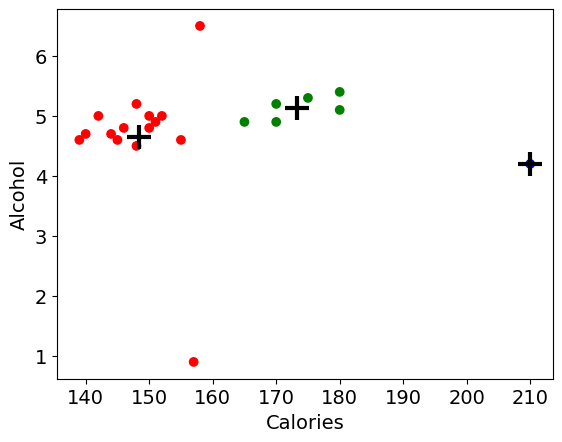

In [31]:
plt.scatter(beer['calories'], beer['alcohol'], c=colors[beer['cluster']])
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

plt.xlabel('Calories')
plt.ylabel('Alcohol')

Text(0.5, 0.98, 'With 3 centroids initialized')

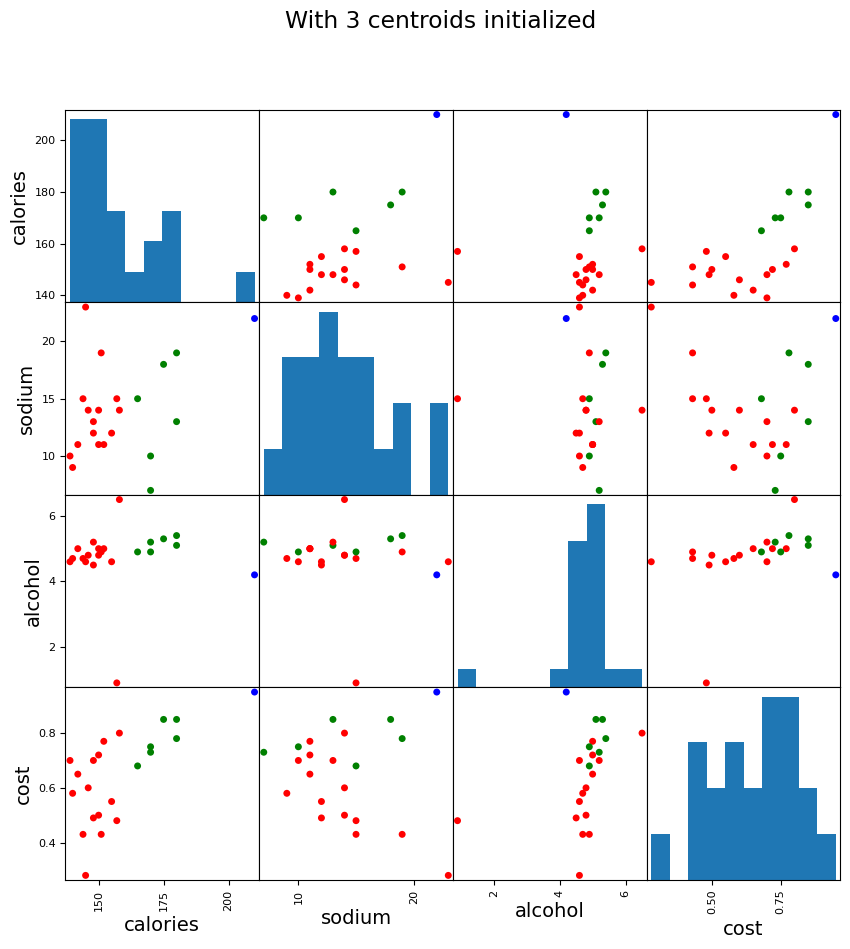

In [36]:
scatter_matrix(beer[['calories', 'sodium', 'alcohol', 'cost']], s=100, alpha=1,
               c=colors[beer['cluster']], figsize=(10, 10))
plt.suptitle('With 3 centroids initialized')

Text(0.5, 0.98, 'With 2 centroids initialized')

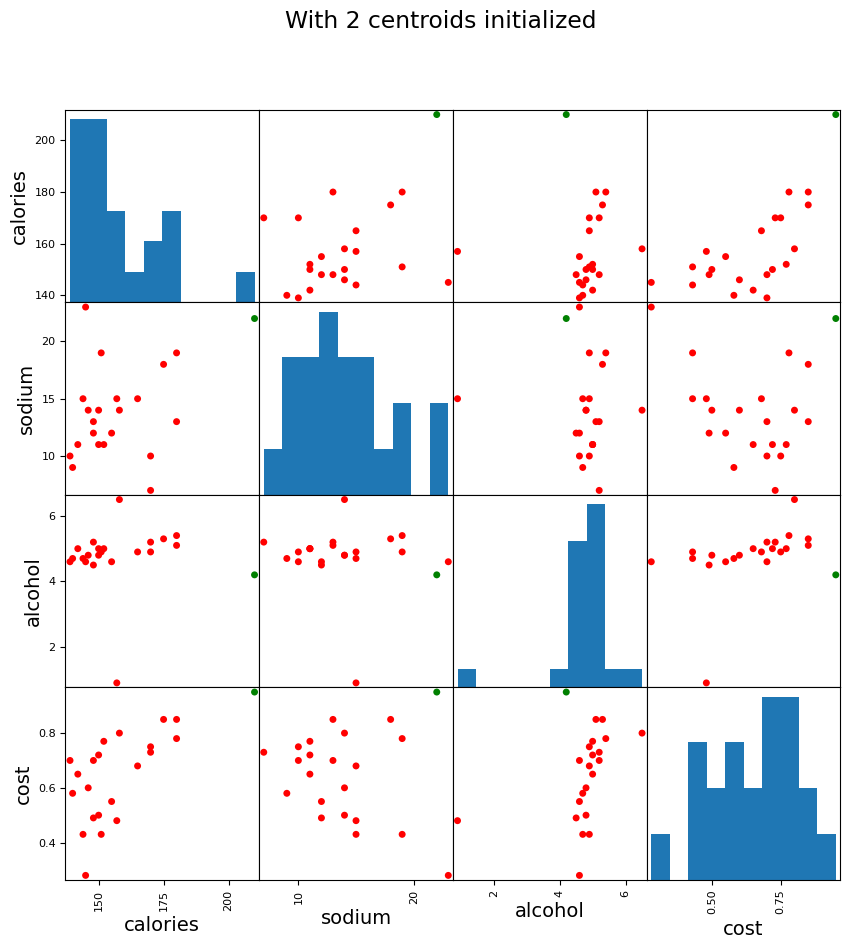

In [34]:
scatter_matrix(beer[['calories', 'sodium', 'alcohol', 'cost']], s=100, alpha=1,
               c=colors[beer['cluster2']], figsize=(10, 10))
plt.suptitle('With 2 centroids initialized')

# Scaled Data

In [39]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-8.33203070e-01,  2.59543429e-01, -6.70263212e-02,
        -1.34763504e+00],
       [-4.15244527e-01,  1.25257916e+00,  1.43627831e-01,
        -1.34763504e+00],
       [-5.69943468e-02,  2.59543429e-01, -4.06945522e+00,
        -1.03944407e+00],
       [ 7.19214376e-01, -1.72652802e+00,  4.59609060e-01,
         5.01510752e-01],
       [-3.55536163e-01, -7.33492298e-01,  2.48954907e-01,
         7.48063524e-01],
       [-7.73494706e-01,  2.24561488e+00, -1.72353397e-01,
        -2.27220793e+00],
       [-4.74952890e-01,  1.12844969e-02,  3.83007550e-02,
        -9.16167687e-01],
       [-5.94369617e-01, -4.85233366e-01, -2.77680474e-01,
        -9.77805880e-01],
       [ 1.01775619e+00,  1.00432022e+00,  5.64936136e-01,
         1.24116907e+00],
       [ 3.10754891e+00,  1.99735595e+00, -5.93661702e-01,
         1.85755100e+00],
       [-1.13174489e+00, -9.81751230e-01, -1.72353397e-01,
         3.16596173e-01],
       [ 1.31629801e+00,  1.25257916e+00,  6.70263212e-01,
      

In [40]:
km3 = KMeans(n_clusters=3).fit(X_scaled)

In [42]:
beer['scaled_cluster'] = km3.labels_
beer.sort_values('scaled_cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
10,Corona,139,10,4.6,0.70,0,0,0
19,Sapporo,148,13,5.2,0.70,0,0,0
18,Peroni,140,9,4.7,0.58,0,0,0
17,Hoegaarden,165,15,4.9,0.68,1,0,0
15,Pilsner_Urquell,170,10,4.9,0.75,1,0,0
12,Beck's,142,11,5.0,0.65,0,0,0
20,Asahi,150,11,5.0,0.72,0,0,0
21,Leffe,158,14,6.5,0.80,0,0,0
4,Heineken,152,11,5.0,0.77,0,0,0
3,Kronenbourg,170,7,5.2,0.73,1,0,0


In [44]:
beer.groupby('scaled_cluster').mean(numeric_only=True)

,calories,sodium,alcohol,cost,cluster,cluster2
scaled_cluster,,,,,,
0,153.40,11.1,5.100,0.7080,0.30,0.00
1,149.50,15.5,4.225,0.4700,0.00,0.00
2,186.25,18.0,5.000,0.8575,1.25,0.25


array([[<Axes: xlabel='calories', ylabel='calories'>,
        <Axes: xlabel='sodium', ylabel='calories'>,
        <Axes: xlabel='alcohol', ylabel='calories'>,
        <Axes: xlabel='cost', ylabel='calories'>],
       [<Axes: xlabel='calories', ylabel='sodium'>,
        <Axes: xlabel='sodium', ylabel='sodium'>,
        <Axes: xlabel='alcohol', ylabel='sodium'>,
        <Axes: xlabel='cost', ylabel='sodium'>],
       [<Axes: xlabel='calories', ylabel='alcohol'>,
        <Axes: xlabel='sodium', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='cost', ylabel='alcohol'>],
       [<Axes: xlabel='calories', ylabel='cost'>,
        <Axes: xlabel='sodium', ylabel='cost'>,
        <Axes: xlabel='alcohol', ylabel='cost'>,
        <Axes: xlabel='cost', ylabel='cost'>]], dtype=object)

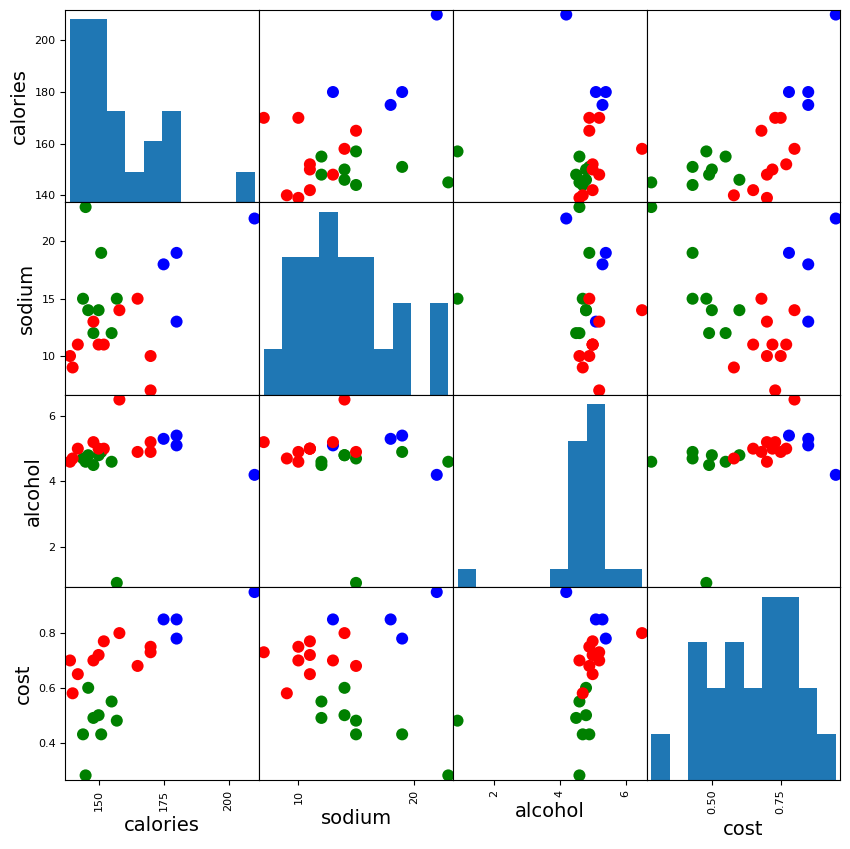

In [46]:
scatter_matrix(
    X,
    c=colors[beer.scaled_cluster],
    alpha=1,
    figsize=(10, 10),
    s=300,
)

In [47]:
from sklearn import metrics 

score_scaled = metrics.silhouette_score(X, beer.scaled_cluster)
score = metrics.silhouette_score(X, beer.cluster)
print(score_scaled, score)

0.10366159902444833 0.5929341487589036


In [48]:
scores = []

for k in range(2, 20):
    labels = KMeans(n_clusters=k).fit(X).labels_ 
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

scores

[0.6040960319606762,
 0.5929341487589036,
 0.37968070249950236,
 0.3672278477752512,
 0.36928250359135434,
 0.4019291611718076,
 0.32090562218825835,
 0.38734168261361474,
 0.34180752319870145,
 0.30326330982283356,
 0.27573937129039733,
 0.2605415698594175,
 0.19113241545383516,
 0.25340994510798304,
 0.19640063091923504,
 0.20669457105517494,
 0.14968525686642692,
 0.12129725273584376]

Text(0, 0.5, 'Sihouette Score')

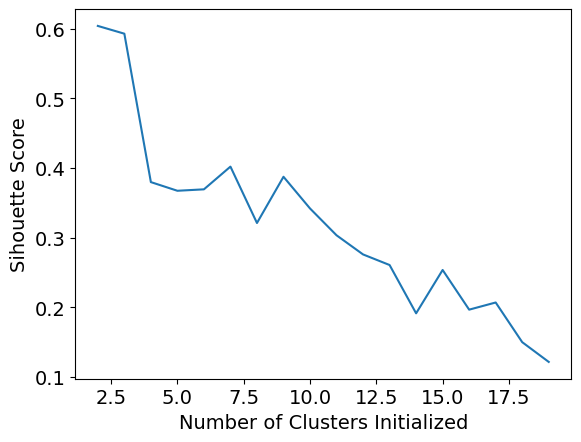

In [50]:
plt.plot(list(range(2, 20)), scores)
plt.xlabel('Number of Clusters Initialized')
plt.ylabel('Sihouette Score')

# *DBSCAN Clustering* 

In [51]:
from sklearn.cluster import DBSCAN 
db = DBSCAN(eps=10, min_samples=2).fit(X)

In [54]:
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0], dtype=int64)

In [55]:
beer['cluster_db'] = labels 
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster,cluster_db
9,Guinness,210,22,4.2,0.95,2,1,2,-1
0,Budweiser,144,15,4.7,0.43,0,0,1,0
19,Sapporo,148,13,5.2,0.70,0,0,0,0
18,Peroni,140,9,4.7,0.58,0,0,0,0
17,Hoegaarden,165,15,4.9,0.68,1,0,0,0
16,Carlsberg,155,12,4.6,0.55,0,0,1,0
15,Pilsner_Urquell,170,10,4.9,0.75,1,0,0,0
14,Sam_Adams,180,13,5.1,0.85,1,0,2,0
13,Amstel,146,14,4.8,0.60,0,0,1,0
12,Beck's,142,11,5.0,0.65,0,0,0,0


In [58]:
import random
from deap import base, creator, tools, algorithms

def eval_func(individual):
    return sum(individual),

IND_SIZE = 5    # 基因长度增加到 5
POP_SIZE = 300
NGEN = 40
CXPB = 0.5
MUTPB = 0.2

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", eval_func)
toolbox.register("mate", tools.cxTwoPoint)  # 保持 cxTwoPoint
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=POP_SIZE)
result_population, logbook = algorithms.eaSimple(population, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, verbose=False)

best_individual = tools.selBest(result_population, 1)[0]
print(f"Best Individual: {best_individual}")
print(f"Best Fitness: {best_individual.fitness.values[0]}")


Best Individual: [1, 1, 1, 1, 1]
Best Fitness: 5.0
